## Dados com conseguir

StackExchange: 

Basta clicar aqui para ser redirecionando [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) aperte run e faça o download do resultado.

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Importando pandas e matplotlib para nossas analises

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploração dos dados e leitura do csv

In [16]:
dados = pd.read_csv('resultado_query.csv', names=['Data', 'Linguagem', 'Q.Posts'], header=0)

In [17]:
dados.head(5)

,Data,Linguagem,Q.Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122


In [18]:
dados.shape

(2230, 3)

In [21]:
dados.count()

Data         2230
Linguagem    2230
Q.Posts      2230
dtype: int64

In [24]:
dados.groupby('Linguagem').sum()

,Q.Posts
Linguagem,
assembly,39192
c,370983
c#,1512951
c++,748323
delphi,48967
go,58193
java,1815420
javascript,2310404
perl,66232


## Tratar os dados

In [28]:
dados.Data = pd.to_datetime(dados.Data)

In [30]:
dados.head(5)

,Data,Linguagem,Q.Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,83
4,2008-08-01,python,122


In [31]:
reshape_dados = dados.pivot(index='Data', columns='Linguagem', values='Q.Posts')

In [32]:
reshape_dados.head(5)

Linguagem,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Data,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,507.0,163.0,14.0,NaN,222.0,163.0,28.0,160.0,122.0,NaN,71.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1990.0,810.0,112.0,NaN,1154.0,726.0,127.0,615.0,508.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,502.0,452.0,1.0,159.0,NaN


In [33]:
reshape_dados.fillna(0, inplace=True)

In [35]:
reshape_dados.isna().values.any()

False

## Graficos usando o matplotlib

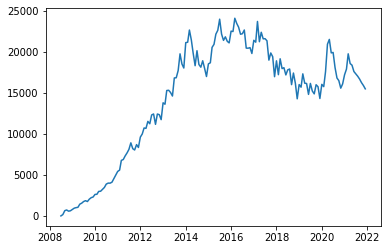

In [42]:
plt.plot(reshape_dados.index, reshape_dados.javascript)

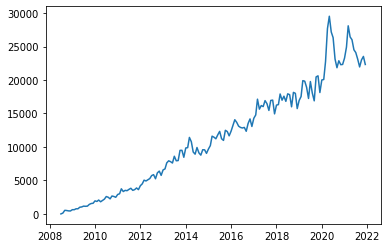

In [43]:
plt.plot(reshape_dados.index, reshape_dados.python)

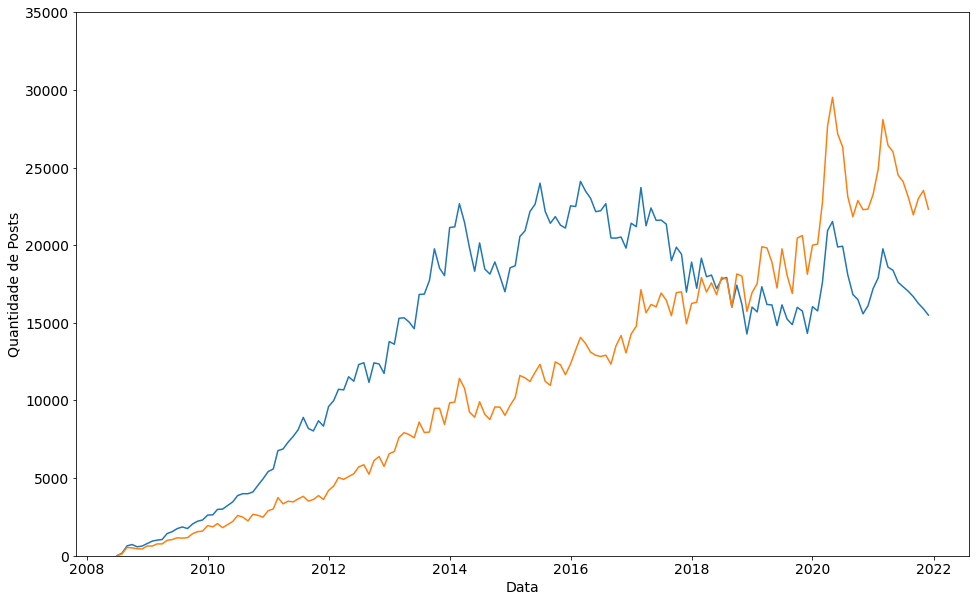

In [45]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade de Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshape_dados.index, reshape_dados.javascript)
plt.plot(reshape_dados.index, reshape_dados.python)

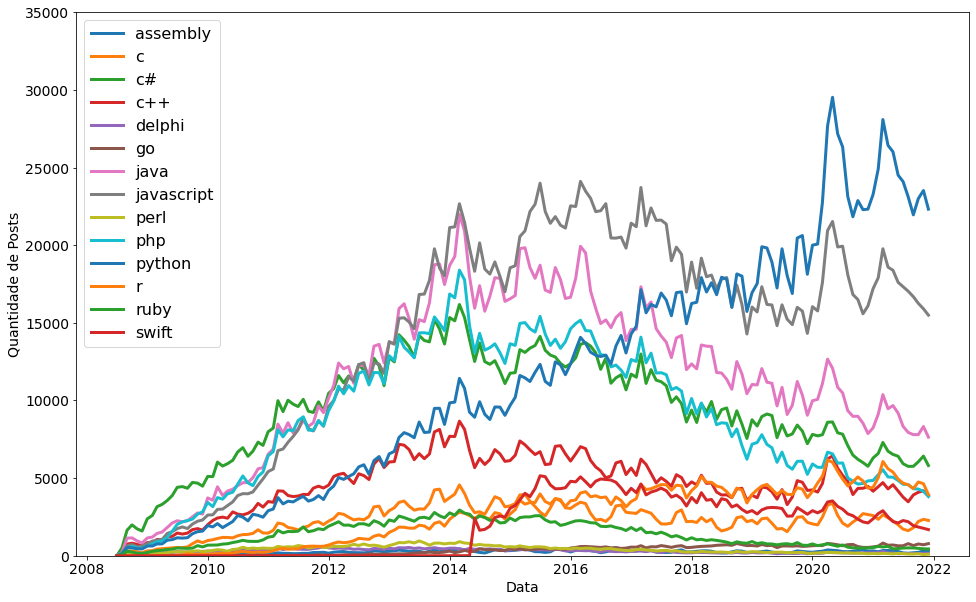

In [46]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade de Posts', fontsize=14)
plt.ylim(0, 35000)

for x in reshape_dados.columns:
    plt.plot(reshape_dados.index, reshape_dados[x], 
                linewidth=3, label=reshape_dados[x].name)

plt.legend(fontsize=16)

### Suavizar a serie temporal

Vamos usar uma média movel para facilitar a leitura e captar a tendencia dos dados.
Usando [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) e [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

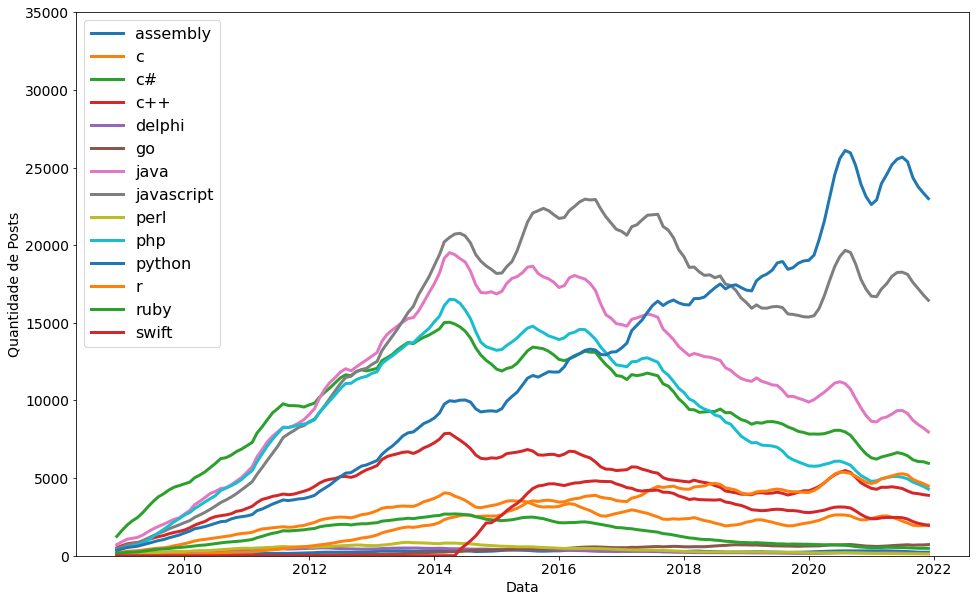

In [47]:
# Sendo o parametro window em rolling que vai mudar a janela de visualização
roll_dados = reshape_dados.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade de Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for x in roll_dados.columns:
    plt.plot(roll_dados.index, roll_dados[x], 
                linewidth=3, label=roll_dados[x].name)

plt.legend(fontsize=16)